<a href="https://colab.research.google.com/github/hoanganhphan0409/fptu/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.datasets import mnist
data = mnist
(X_train,y_train),(X_test,y_test) = data.load_data()

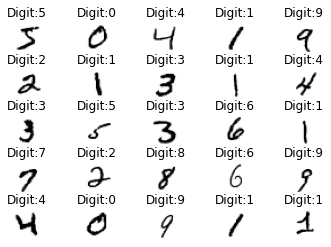

In [ ]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap='gray_r')
    plt.title("Digit:{}".format(y_train[i]))
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
X_train = X_train/255.
X_test = X_test/225.

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
  model = tf.keras.Sequential(layers=[
      tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", input_shape=[28,28,1]),
      tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=(2, 2,), strides=(2, 2,)), # 14
      tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=(2, 2,), strides=(2, 2,)), # 7
      tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding="same", activation="relu"),
      tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding="same", activation="relu"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
  ])

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0392 - val_accuracy: 0.9909
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0337 - val_accuracy: 0.9929
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0327 - val_accuracy: 0.9933
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0398 - val_accuracy: 0.9919
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0300 - val_accuracy: 0.9932
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0388 - val_accuracy: 0.9916
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0334 - val_accuracy:

In [ ]:
model.evaluate(x=X_test,y=y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0597 - accuracy: 0.9925


[0.05971667543053627, 0.9925000071525574]

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

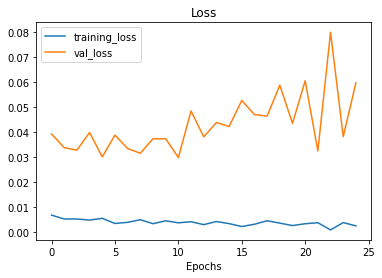

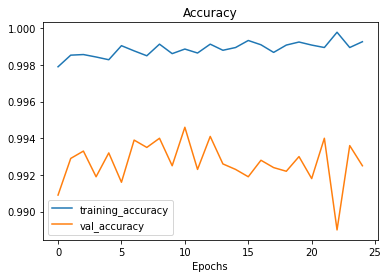

In [ ]:
plot_loss_curves(history)